In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
 IMG_SIZE=224
 BATCH_SIZE=32

In [33]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [34]:
 train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzhimer/test',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
 )

Found 130 images belonging to 4 classes.


In [35]:
 val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzhimer/test',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
 )

Found 32 images belonging to 4 classes.


In [57]:
class_indices = train_generator.class_indices
class_names=list(class_indices.keys())
print(class_names)
print(class_indices)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [58]:
 model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',
input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
 model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2698 - loss: 1.7558

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.2761 - loss: 1.7449 - val_accuracy: 0.3125 - val_loss: 1.3118
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3192 - loss: 1.3233 - val_accuracy: 0.4062 - val_loss: 1.2721
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4039 - loss: 1.2519 - val_accuracy: 0.3125 - val_loss: 1.2604
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3739 - loss: 1.2443 - val_accuracy: 0.3438 - val_loss: 1.2650
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3426 - loss: 1.2796 - val_accuracy: 0.4375 - val_loss: 1.2609


In [61]:
 model.save('/content/drive/MyDrive/alzhimer.h5')

In [62]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/alzhimer.h5')
print('Model Loaded Sucessfully')


Model Loaded Sucessfully


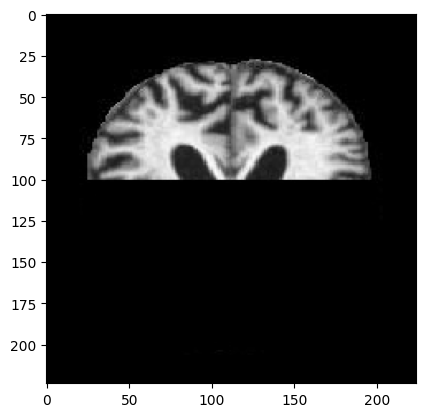

In [63]:
test_image_path="/content/drive/MyDrive/alzhimer/test/ModerateDemented/30 (2).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [64]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0

In [65]:
prediction= model.predict(img_array)
print(prediction)
ind=np.argmax(prediction)
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
[[0.24478716 0.24442197 0.25845897 0.25233188]]
NonDemented
